In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
#import warning
import pandas as pd
import numpy as np
from matplotlib import cm


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the Rider Data
rider_info = pd.read_csv(ride_data_to_load)

# Read the City and Ride Data
city_info = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
city_ride_data_merge = pd.merge(rider_info, city_info, on="city", how="left")

# Display the data table for preview
city_ride_data_merge.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot of Ride Sharing Data

In [24]:
city_ride_data = city_ride_data_merge.groupby(['type','city','driver_count'])
print(city_ride_data)

In [25]:
#Calculations:
#y_axis = Average Fare by City
y_axis = city_ride_data['fare'].mean()

In [26]:
 #x_axis = number riders per city
x_axis = city_ride_data['fare'].count()

In [27]:
city_ride_cal_df = pd.DataFrame({"Number of Riders Per City":x_axis,
                                 "Average Fare per city":y_axis})
city_ride_cal_df.head()

Number of Riders Per City  \
type  city           driver_count                              
Rural Bradshawfurt   7                                    10   
      Garzaport      7                                     3   
      Harringtonfort 4                                     6   
      Jessicaport    1                                     6   
      Lake Jamie     4                                     6   

                                   Average Fare per city  
type  city           driver_count                         
Rural Bradshawfurt   7                         40.064000  
      Garzaport      7                         24.123333  
      Harringtonfort 4                         33.470000  
      Jessicaport    1                         36.013333  
      Lake Jamie     4                         34.358333

In [39]:
city_ride_cal_df = city_ride_cal_df.reset_index()
city_ride_cal_df.head()

,type,city,driver_count,Number of Riders Per City,Average Fare per city
0,Rural,Bradshawfurt,7,10,40.064000
1,Rural,Garzaport,7,3,24.123333
2,Rural,Harringtonfort,4,6,33.470000
3,Rural,Jessicaport,1,6,36.013333
4,Rural,Lake Jamie,4,6,34.358333


In [28]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


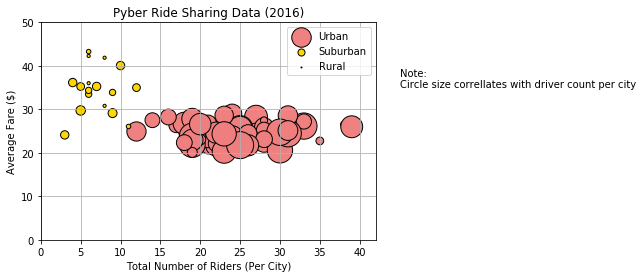

In [68]:
plt.xlim(0,42)
plt.ylim(0,50)

# Obtain the x and y coordinates for each of the three city types

df_urban = city_ride_cal_df.loc[city_ride_cal_df['type'] == 'Urban']
df_rural = city_ride_cal_df.loc[city_ride_cal_df['type'] == 'Rural']
df_Suburan = city_ride_cal_df.loc[city_ride_cal_df['type'] == 'Suburan']

x_urban = df_urban['Number of Riders Per City']
y_urban = df_urban['Average Fare per city']
s_urban = df_urban['driver_count']

x_rural = df_rural['Number of Riders Per City']
y_rural = df_rural['Average Fare per city']
s_rural = df_rural['driver_count']

x_suburban = df_Suburan['Number of Riders Per City']
y_suburban = df_Suburan['Average Fare per city']
s_suburban = df_Suburan['driver_count']

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s_urban*10, facecolors="lightcoral", edgecolors="black",alpha=0.99)
plt.scatter(x_rural, y_rural, s_rural*10, facecolors="gold", edgecolors="black",alpha=0.99)
plt.scatter(x_suburban, y_suburban, s_suburban*10, facecolors="skyblue", edgecolors="black",alpha=0.99)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(['Urban','Suburban','Rural'])

# Incorporate a text label regarding circle size
plt.text(45,35,"Note:\nCircle size correllates with driver count per city")

# Save Figure
plt.savefig("Image.bubblepyber.png")

plt.show()